In [2]:
# Dependencies and setup
import pandas as pd
import os

# csv paths
kaggle_path = "Resources/kaggle_clean.csv"
dow_path = "Resources/dow_clean.csv"
indu_path = "Resources/indu_clean.csv"
spy_path = "Resources/spy_clean.csv"

# Read the csv files into dataframes - NEW update to to avoid overwriting the file path variables
kaggle_df = pd.read_csv(kaggle_path)
dow_df = pd.read_csv(dow_path)
indu_df = pd.read_csv(indu_path)
spy_df = pd.read_csv(spy_path)

In [3]:
# Create list of DataFrames
all_csvs = [kaggle_df, dow_df, indu_df, spy_df]

# Process each DataFrame
for df in all_csvs:   
    columns = df.columns.tolist()
    columns = ['symbol'] + [col for col in columns if col != 'symbol']
    df = df.sort_values(by="date", ascending=True)
    df = df[columns]
    df = df.round(2)
    print(f"{df.head()}")



      symbol        date   open   high    low  close    volume
0       NVDA  2014-06-02   4.76   4.80   4.70   4.74  18150000
10056   PANW  2014-06-02  25.04  25.06  24.00  24.56   6110100
12571    NOW  2014-06-02  52.33  52.34  49.46  50.26   3069100
2515    META  2014-06-02  63.23  63.59  62.05  63.08  35996000
15086    AMD  2014-06-02   4.03   4.03   3.94   3.97  10859500
     symbol        date   open   high    low  close   volume
1309    DOW  2019-03-20  52.75  53.50  49.50  49.80  2350838
1308    DOW  2019-03-21  49.99  50.00  48.20  48.98  1764671
1307    DOW  2019-03-22  48.80  49.95  48.16  48.60   844690
1306    DOW  2019-03-25  48.60  49.40  48.00  49.15   440892
1305    DOW  2019-03-26  49.00  49.75  48.18  48.85   504734
     symbol        date  open  high  low  close  volume
1704   INDU  2017-08-21  9.81  9.81  9.7   9.70   52682
1703   INDU  2017-08-22  9.70  9.70  9.7   9.70   27295
1702   INDU  2017-08-23  9.70  9.70  9.7   9.70       5
1701   INDU  2017-08-24  9.70  9

In [4]:
# Combine kaggle data and index csvs into one csv
master_df = pd.concat(all_csvs, ignore_index=True)
master_df


,symbol,date,open,high,low,close,volume
0,NVDA,2014-06-02,4.7650,4.795,4.6950,4.7350,18150000
1,NVDA,2014-06-03,4.7450,4.750,4.6525,4.7150,24321200
2,NVDA,2014-06-04,4.7025,4.755,4.7000,4.7200,16123600
3,NVDA,2014-06-05,4.7275,4.755,4.7000,4.7400,18869600
4,NVDA,2014-06-06,4.7625,4.800,4.7450,4.7575,16105200
...,...,...,...,...,...,...,...
26483,SPY,2017-08-28,245.1700,245.200,244.0900,244.5700,40565606
26484,SPY,2017-08-25,244.9000,245.610,244.3900,244.5600,64445912
26485,SPY,2017-08-24,245.0000,245.180,243.7500,243.9900,50741671
26486,SPY,2017-08-23,244.3300,245.050,244.1600,244.5600,50203837


In [5]:
#define path to Resources folder
resources_path = "Resources"

file_path = os.path.join(resources_path, "master.csv")
master_df.to_csv(file_path, index=False, header=True)

In [6]:
#reading df svc file
master_df = pd.read_csv(file_path)

In [7]:
# FILTER DATA to ensure that we compare the stok for the same period, we set up data frame based on data periods avaiailble for free actross all stocks
# Convert 'date' column to datetime type to ensure correct filtering
master_df['date'] = pd.to_datetime(master_df['date'])

# Define the date range
start_date = '2019-03-20'
end_date = '2024-05-28'

# Filter the DataFrame based on the date range
filtered_df = master_df[(master_df['date'] >= start_date) & (master_df['date'] <= end_date)]

# Set 'date' column as the index
filtered_df.set_index('date', inplace=True)

# Display the first few rows to check the result
print(filtered_df.head())



           symbol       open       high        low      close    volume
date                                                                   
2019-03-20   NVDA  44.220001  44.757500  43.250000  43.599998  71914800
2019-03-21   NVDA  43.832500  46.250000  43.782501  45.985001  82431200
2019-03-22   NVDA  45.709999  46.200001  44.235001  44.375000  74764400
2019-03-25   NVDA  43.965000  44.612499  42.777500  43.445000  52521200
2019-03-26   NVDA  44.872501  45.437500  43.650002  44.217499  70350800


In [8]:
# Save the filtered DataFrame to a new CSV file if needed
output_path = os.path.join(resources_path, "filtered_master.csv")
filtered_df.to_csv(output_path, index=True, header=True)

In [9]:
#reading df svc file
df = pd.read_csv(output_path)

In [10]:
# THIS CODE COUNTS DAILY RETURNS FOR EACH DAY FOR EACH SYMBOL (STOCK)

# Convert 'date' column to datetime type to be on the safe side as we merge several data sets
df['date'] = pd.to_datetime(df['date'])

# Sort DataFrame by 'symbol' and 'date' to ensure our merged (updated) data is sorted.
df = df.sort_values(by=['symbol', 'date'], ascending=[True, True])

# Calculate the daily return for each symbol
# It is calculated as: (current day's close - previous day's close) / previous day's close
df['daily_return'] = df.groupby('symbol')['close'].pct_change()

# Display the first few rows to check the result
print(df.head(10))

# Save the result to a new CSV file
df.to_csv('Resources/daily_returns_master.csv', index=False)

            date symbol        open        high         low       close  \
11237 2020-12-09     AI  100.000000  115.000000   90.029999   92.489998   
11238 2020-12-10     AI   99.480003  131.746002   96.000000  130.000000   
11239 2020-12-11     AI  123.820000  133.000000  116.000000  119.580002   
11240 2020-12-14     AI  122.160004  123.830002  100.660004  102.360001   
11241 2020-12-15     AI  104.570000  109.889999   98.099998  102.000000   
11242 2020-12-16     AI  105.000000  116.709999  104.000000  113.690002   
11243 2020-12-17     AI  118.440002  121.000000  115.449997  117.239998   
11244 2020-12-18     AI  116.669998  145.000000  115.089996  137.589996   
11245 2020-12-21     AI  142.014008  168.770004  141.000000  160.889999   
11246 2020-12-22     AI  170.529999  179.000000  163.300003  177.470001   

         volume  daily_return  
11237  24805600           NaN  
11238  22839500      0.405557  
11239  11758600     -0.080154  
11240   8197500     -0.144004  
11241   571530

In [11]:
# THIS CODE COUNTS AVERAGE DAILY RETURNS AND CLOSING PRICES PER EACH YEAR FOR EACH STOCK TO TRACK PERFORMANCE CHANGES OVER THE PERIOD
# THIS CODE ALSO CALCULATES VOLATILITY (the standard deviation of daily returns for each symbol and year)

# Convert 'date' column to datetime type to be on the safe side as we merge several data sets
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the date
df['year'] = df['date'].dt.year

# Calculate the daily return for each symbol
# The daily return is calculated as: (current day's close - previous day's close) / previous day's close
df['daily_return'] = df.groupby('symbol')['close'].pct_change()

# Calculate the average daily return and average closing price for each symbol and year
average_daily_return = df.groupby(['symbol', 'year'])['daily_return'].mean().reset_index()
average_closing_price = df.groupby(['symbol', 'year'])['close'].mean().reset_index()

# Calculate the median closing price for each symbol and year
median_closing_price = df.groupby(['symbol', 'year'])['close'].median().reset_index()

# Calculate volatility (standard deviation of daily returns) for each symbol and year
volatility = df.groupby(['symbol', 'year'])['daily_return'].std().reset_index()

# Rename columns for clarity
average_daily_return.rename(columns={'daily_return': 'average_daily_return'}, inplace=True)
average_closing_price.rename(columns={'close': 'average_closing_price'}, inplace=True)
median_closing_price.rename(columns={'close': 'median_closing_price'}, inplace=True)
volatility.rename(columns={'daily_return': 'volatility'}, inplace=True)

# Merge the DataFrames on 'symbol' and 'year'
average_daily_statistics = pd.merge(average_daily_return, average_closing_price, on=['symbol', 'year'])
average_daily_statistics = pd.merge(average_daily_statistics, median_closing_price, on=['symbol', 'year'])
average_daily_statistics = pd.merge(average_daily_statistics, volatility, on=['symbol', 'year'])

# Sort the resulting DataFrame by 'year' and then by 'average_daily_return' in descending order
average_daily_statistics = average_daily_statistics.sort_values(by=['year', 'average_daily_return'], ascending=[True, False])

# Save the result to a new CSV file
average_daily_statistics.to_csv('Resources/average_daily_statistics.csv', index=False)

# Display the average daily statistics
print(average_daily_statistics.head(10))




   symbol  year  average_daily_return  average_closing_price  \
5     AMD  2019              0.003357              31.996985   
69   TSLA  2019              0.002608              17.666714   
47   NVDA  2019              0.001772              45.159284   
35   META  2019              0.001214             187.937738   
41    NOW  2019              0.000953             265.171809   
63    SPY  2019              0.000706             296.518191   
23    DOW  2019              0.000695              50.386985   
11   AMZN  2019              0.000219              91.359309   
53   PANW  2019             -0.000140              74.033015   
17   ANET  2019             -0.001528              61.846281   

    median_closing_price  volatility  
5              30.690001    0.029594  
69             16.319332    0.030528  
47             44.522499    0.022850  
35            188.250000    0.015747  
41            265.859985    0.021432  
63            294.040000    0.007787  
23             50.4800

In [12]:
print(average_daily_statistics.tail(5))

# this shows (please see above) that AMD, Tesla, and NVIDIA whad the best average daily returns in 2019.
# in 2019 INDU, PATH, TSLA had the lowest avarage daily returns (please see 5 rows below)

   symbol  year  average_daily_return  average_closing_price  \
46    NOW  2024              0.000474             751.299313   
4      AI  2024             -0.000895              26.397647   
34   INDU  2024             -0.001066               7.576863   
62   PATH  2024             -0.002413              22.040882   
74   TSLA  2024             -0.002730             185.618530   

    median_closing_price  volatility  
46            758.080017    0.018441  
4              26.165000    0.041751  
34              7.780000    0.018357  
62             22.570000    0.026201  
74            180.000000    0.035188  


In [13]:
# THIS CODE COUNTS CUMULATIVE RETURNS OF EACH YEAR FOR EACH SYMBOL (STOCK)

# Load the new CSV file
data_path = 'Resources/daily_returns_master.csv'
yearly_df = pd.read_csv(data_path)

# Convert 'date' column to datetime type to be on the safe side as we merge several data sets
yearly_df['date'] = pd.to_datetime(yearly_df['date'])

# Extract the year from the date
yearly_df['year'] = yearly_df['date'].dt.year

# Ensure daily returns are numerical
if yearly_df['daily_return'].dtype == 'object':
    yearly_df['daily_return'] = yearly_df['daily_return'].str.rstrip('%').astype('float') / 100.0
else:
    yearly_df['daily_return'] = yearly_df['daily_return'].astype('float')

# Define a function to calculate cumulative returns
def cumulative_return(x):
    return (1 + x.dropna()).cumprod() - 1

# Apply cumulative return calculation to each group and get the last value of each year
cumulative_returns = yearly_df.groupby(['symbol', 'year'])['daily_return'].apply(cumulative_return).reset_index()

# Merge the cumulative returns back to the original DataFrame
yearly_df = yearly_df.merge(cumulative_returns[['symbol', 'year', 'daily_return']], on=['symbol', 'year'], how='left', suffixes=('', '_cumulative'))

# Rename the merged column to 'cumulative_return'
yearly_df.rename(columns={'daily_return_cumulative': 'cumulative_return'}, inplace=True)

# Drop duplicates and NaN values
yearly_df.drop_duplicates(subset=['symbol', 'year'], inplace=True)
yearly_df.dropna(subset=['cumulative_return'], inplace=True)

# Save the result to a new CSV file
output_path = 'Resources/yearly_returns_master.csv'
yearly_df.to_csv(output_path, index=False)

# Display the first few rows to check the result
print(yearly_df.head(10))

## IMPORTANT: this code shows the value of cumulative return on the row with the first date of the corresponding year.
## this way we can track stocks that appeared on the stock market later or to highlight the data limitation of the free data we exported

             date symbol        open        high         low       close  \
0      2020-12-09     AI  100.000000  115.000000   90.029999   92.489998   
240    2021-01-04     AI  131.139999  131.205002  119.059998  120.010002   
63744  2022-01-03     AI   31.490000   32.360001   30.430000   32.299999   
126745 2023-01-03     AI   11.430000   11.540000   10.812000   11.070000   
189245 2024-01-02     AI   28.559999   29.730000   28.150000   28.740000   
199649 2019-03-20    AMD   26.490000   26.879999   25.309999   25.700001   
239051 2020-01-02    AMD   46.860001   49.250000   46.630001   49.099998   
303060 2021-01-04    AMD   92.110001   96.059998   90.919998   92.300003   
366564 2022-01-03    AMD  145.139999  151.649994  145.020004  150.240005   
429565 2023-01-03    AMD   66.000000   66.879997   63.590000   64.019997   

           volume  daily_return  year  cumulative_return  
0        24805600           NaN  2020           0.405557  
240       5123800     -0.135063  2021        

In [14]:
# THIS CODE COUNTS AVERAGE CUMULATIVE RETURNS AND AV.CLOSING PRICES FOR THE LAST 5 YEARS FOR EACH STOCK TO DISPLAY OVERALL COMPANY STANDING IN THE ANALYZED PERIOD

# Calculate the average yearly returns and average yearly closing prices for each symbol
average_yearly_return = yearly_df.groupby(['symbol', 'year'])['daily_return'].mean().reset_index()
average_yearly_closing_price = yearly_df.groupby(['symbol', 'year'])['close'].mean().reset_index()

# Calculate the average return and average closing price across all years for each symbol
average_yearly_return = average_yearly_return.groupby('symbol')['daily_return'].mean().reset_index()
average_yearly_closing_price = average_yearly_closing_price.groupby('symbol')['close'].mean().reset_index()

# Rename columns for clarity
average_yearly_return.rename(columns={'daily_return': 'average_yearly_return'}, inplace=True)
average_yearly_closing_price.rename(columns={'close': 'average_yearly_closing_price'}, inplace=True)

# Merge the two DataFrames on 'symbol'
average_yearly_statistics = pd.merge(average_yearly_return, average_yearly_closing_price, on='symbol')

# Sort the resulting DataFrame by 'average_yearly_return' in descending order
average_yearly_statistics = average_yearly_statistics.sort_values(by='average_yearly_return', ascending=False)

# Save the result to a new CSV file
average_yearly_statistics.to_csv('Resources/average_yearly_statistics.csv', index=False)

# Display the average yearly statistics
print(average_yearly_statistics)


   symbol  average_yearly_return  average_yearly_closing_price
5    INDU               0.015390                      7.225000
12   TSLA               0.015065                    174.437888
1     AMD               0.009932                     86.656668
2    AMZN               0.007224                    125.041664
6    META               0.005605                    242.288336
8    NVDA               0.000082                    193.458745
11    SPY              -0.001656                    384.398333
4     DOW              -0.003947                     53.471667
9    PANW              -0.008614                    147.733892
3    ANET              -0.009983                    115.215418
7     NOW              -0.014898                    460.970006
10   PATH              -0.019252                     37.240000
0      AI              -0.027785                     56.922000


In [15]:
print(average_daily_statistics) #verifying if now issues with this vvariable


   symbol  year  average_daily_return  average_closing_price  \
5     AMD  2019              0.003357              31.996985   
69   TSLA  2019              0.002608              17.666714   
47   NVDA  2019              0.001772              45.159284   
35   META  2019              0.001214             187.937738   
41    NOW  2019              0.000953             265.171809   
..    ...   ...                   ...                    ...   
46    NOW  2024              0.000474             751.299313   
4      AI  2024             -0.000895              26.397647   
34   INDU  2024             -0.001066               7.576863   
62   PATH  2024             -0.002413              22.040882   
74   TSLA  2024             -0.002730             185.618530   

    median_closing_price  volatility  
5              30.690001    0.029594  
69             16.319332    0.030528  
47             44.522499    0.022850  
35            188.250000    0.015747  
41            265.859985    0.021432

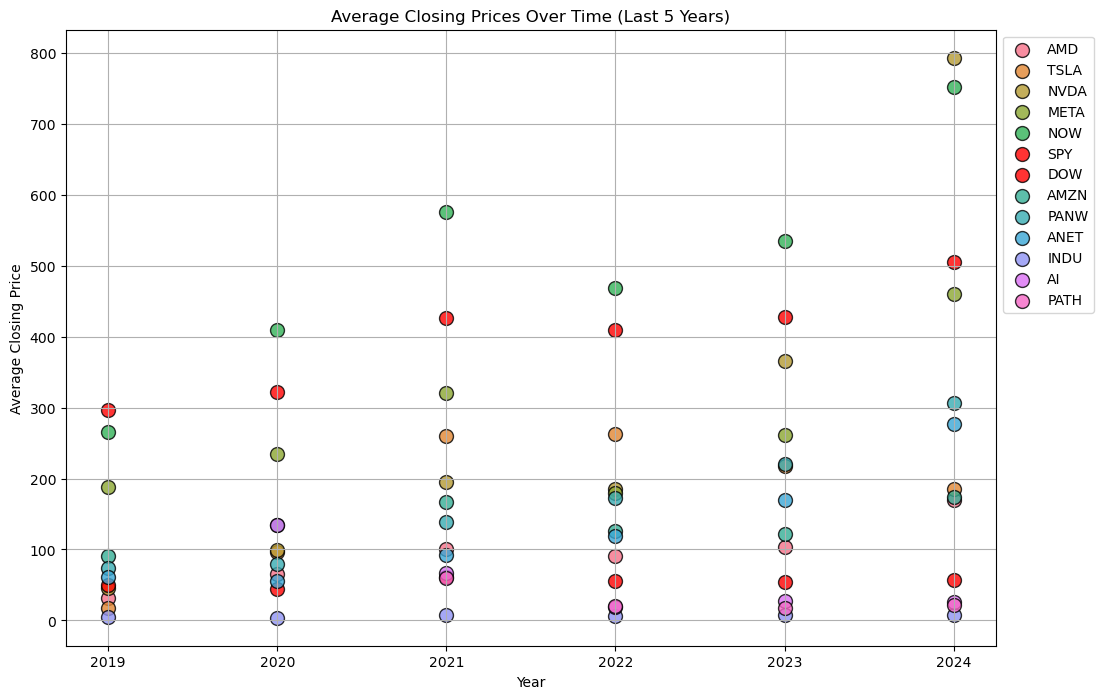

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Ensure 'year' column is treated as a categorical variable
average_daily_statistics['year'] = average_daily_statistics['year'].astype(str)

# Convert year to a numerical value for regression calculation
average_daily_statistics['year_num'] = average_daily_statistics['year'].astype(int)

# Set up the plot size
plt.figure(figsize=(12, 8))

# Set red colors for S&P 500 and Dow Jones for better visualization where they are in comparison to other AI companies
special_colors = {
    'SPY': 'red',  # SPY is the symbol for S&P 500
    'DOW': 'red',  # DOW is the symbol for Dow Jones
}

# Get a list of unique symbols excluding SPY and DOW
unique_symbols = [symbol for symbol in average_daily_statistics['symbol'].unique() if symbol not in special_colors]

# Generate a bright color palette for the remaining symbols to defirentiate AI companies from S&P500 and Dow Jones
palette = sns.color_palette("husl", len(unique_symbols))

# Create a color map for all symbols
color_map = {symbol: color for symbol, color in zip(unique_symbols, palette)}
color_map.update(special_colors)

# Scatter points for each company
for symbol in average_daily_statistics['symbol'].unique():
    subset = average_daily_statistics[average_daily_statistics['symbol'] == symbol]
    color = color_map[symbol]
    plt.scatter(subset['year_num'], subset['average_closing_price'], label=symbol, color=color, alpha=0.8, edgecolors='black', s=100)

# Add plot details
plt.title('Average Closing Prices Over Time (Last 5 Years)')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

# Save the figure
plt.savefig('average_closing_prices_over_time.png', bbox_inches='tight')

# Show the plot
plt.show()